<a href="https://colab.research.google.com/github/Ziadmohamed345/Sentiment-Analysis-on-Arabic-English-Tweets/blob/main/Sentiment_Analysis_on_Arabic_English_on_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sentiment Analysis on Arabic/English Tweets**

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils.class_weight import compute_class_weight
from keras.layers import Embedding, SimpleRNN, Dense
from keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Activation
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data= pd.read_csv('Tweets11.csv')
data

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,positive
27479,ed167662a5,But it was worth it ****.,positive


In [ ]:
# Get the count of rows in the DataFrame
print(data.shape[0])

27481


In [ ]:
# Drop duplicate rows
data = data.drop_duplicates()
print(data.shape[0])

27481


In [ ]:
data.isna().sum()

textID       0
text         1
sentiment    0
dtype: int64

In [ ]:
data.dropna(subset=['text'], inplace=True)
data

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,positive
27479,ed167662a5,But it was worth it ****.,positive


In [ ]:
data.isna().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [ ]:
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
data['sentiment'] = data['sentiment'].str.lower().map(sentiment_mapping)
data

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,-1
2,088c60f138,my boss is bullying me...,-1
3,9642c003ef,what interview! leave me alone,-1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",-1
...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,-1
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,-1
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,1
27479,ed167662a5,But it was worth it ****.,1


Text(0.5, 1.0, 'Sentiment Data Distribution')

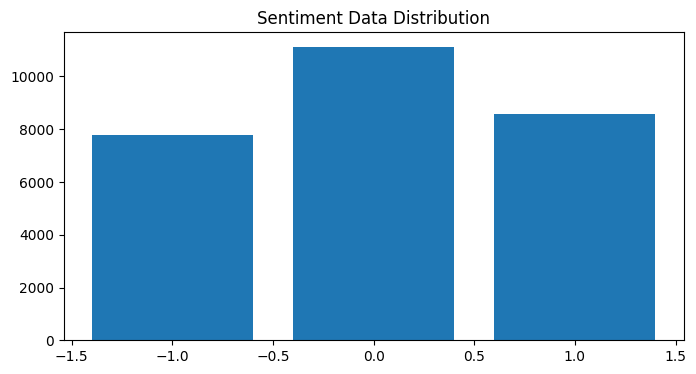

In [ ]:
val_count = data.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
total_samples = len(data)
positive_samples = len(data[data['sentiment'] == 1])
negative_samples = len(data[data['sentiment'] == -1])
neutral_samples = len(data[data['sentiment'] == 0])

positive_percentage = (positive_samples / total_samples) * 100
negative_percentage = (negative_samples / total_samples) * 100
neutral_percentage = (neutral_samples / total_samples) * 100

print("Positive Percentage:", positive_percentage)
print("Negative Percentage:", negative_percentage)
print("Neutral Percentage:", neutral_percentage)

Positive Percentage: 31.22998544395924
Negative Percentage: 28.315138282387192
Neutral Percentage: 40.45487627365357


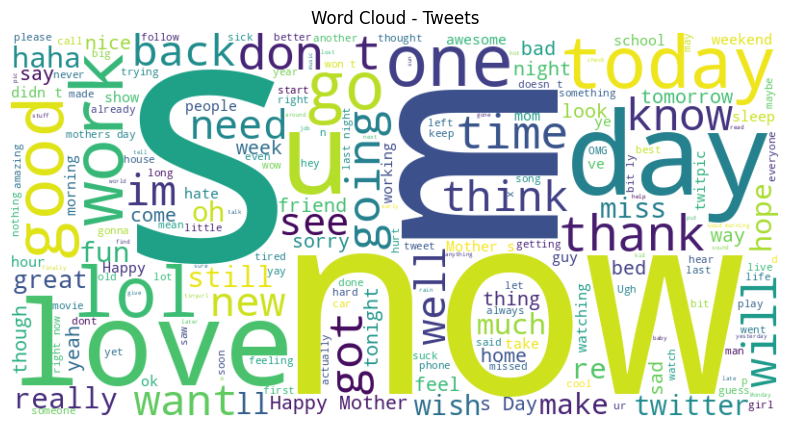

In [ ]:
all_tweets = " ".join(data['text'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_tweets)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud - Tweets")
plt.axis("off")
plt.show()

In [ ]:
import re

def preprocess_text(text):
    # Make all letters lowercase
    text = text.lower()

    # Remove characters other than letters and numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    return text

data["text"] = data["text"].apply(preprocess_text)

In [ ]:
data["text"]

0                        id have responded if i were going
1               sooo sad i will miss you here in san diego
2                                   my boss is bullying me
3                            what interview leave me alone
4         sons of  why couldnt they put them on the rel...
                               ...                        
27476     wish we could come see u on denver  husband l...
27477     ive wondered about rake to  the client has ma...
27478     yay good for both of you enjoy the break  you...
27479                                but it was worth it  
27480       all this flirting going on  the atg smiles ...
Name: text, Length: 27480, dtype: object

In [ ]:
# Function for text cleaning
def clean_text(text):
    # Remove HTML tags using regex
    text = re.sub(r'<.*?>', '', text)

    return text

data['text'] = data['text'].apply(clean_text)

data

,textID,text,sentiment
0,cb774db0d1,id have responded if i were going,0
1,549e992a42,sooo sad i will miss you here in san diego,-1
2,088c60f138,my boss is bullying me,-1
3,9642c003ef,what interview leave me alone,-1
4,358bd9e861,sons of why couldnt they put them on the rel...,-1
...,...,...,...
27476,4eac33d1c0,wish we could come see u on denver husband l...,-1
27477,4f4c4fc327,ive wondered about rake to the client has ma...,-1
27478,f67aae2310,yay good for both of you enjoy the break you...,1
27479,ed167662a5,but it was worth it,1


In [ ]:
# Remove numbers from the 'text' column
data['text'] = data['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
def remove_repeated_words(text):
    return re.sub(r'\b(\w+)\s+\1\b', r'\1', text)


# Remove repeated words from the 'text' column
data['text'] = data['text'].apply(remove_repeated_words)

In [ ]:
def remove_links(text):
    return re.sub(r'http\S+', '', text)

data['text'] = data['text'].apply(remove_links)

In [ ]:
#tokenizing the data

data['tokens'] = data.apply(lambda row: word_tokenize(row['text']), axis = 1)
data.head()

,textID,text,sentiment,tokens
0,cb774db0d1,id have responded if i were going,0,"[id, have, responded, if, i, were, going]"
1,549e992a42,sooo sad i will miss you here in san diego,-1,"[sooo, sad, i, will, miss, you, here, in, san,..."
2,088c60f138,my boss is bullying me,-1,"[my, boss, is, bullying, me]"
3,9642c003ef,what interview leave me alone,-1,"[what, interview, leave, me, alone]"
4,358bd9e861,sons of why couldnt they put them on the rel...,-1,"[sons, of, why, couldnt, they, put, them, on, ..."


In [ ]:
def remove_stopwords(words, stop_words = stop_words):
    return [word for word in words if word not in stop_words]

In [ ]:
data['tokens'] = data.apply(lambda row: remove_stopwords(row['tokens']), axis = 1)
data.head()

,textID,text,sentiment,tokens
0,cb774db0d1,id have responded if i were going,0,"[id, responded, going]"
1,549e992a42,sooo sad i will miss you here in san diego,-1,"[sooo, sad, miss, san, diego]"
2,088c60f138,my boss is bullying me,-1,"[boss, bullying]"
3,9642c003ef,what interview leave me alone,-1,"[interview, leave, alone]"
4,358bd9e861,sons of why couldnt they put them on the rel...,-1,"[sons, couldnt, put, releases, already, bought]"


In [ ]:
corpus = []
for i in data['tokens']:
    msg = ' '.join(row for row in i)
    corpus.append(msg)

data['cleantext'] = corpus
data.head()

,textID,text,sentiment,tokens,cleantext
0,cb774db0d1,id have responded if i were going,0,"[id, responded, going]",id responded going
1,549e992a42,sooo sad i will miss you here in san diego,-1,"[sooo, sad, miss, san, diego]",sooo sad miss san diego
2,088c60f138,my boss is bullying me,-1,"[boss, bullying]",boss bullying
3,9642c003ef,what interview leave me alone,-1,"[interview, leave, alone]",interview leave alone
4,358bd9e861,sons of why couldnt they put them on the rel...,-1,"[sons, couldnt, put, releases, already, bought]",sons couldnt put releases already bought


In [ ]:
data.drop(columns=['textID'], inplace=True)

In [ ]:
data.tail(20)

,text,sentiment,tokens,cleantext
27461,again thanks to my dear neighboor who also ga...,1,"[thanks, dear, neighboor, also, gave, coffee, ...",thanks dear neighboor also gave coffee needed ...
27462,just back from bingo wfamily i won over fun ...,1,"[back, bingo, wfamily, fun, night]",back bingo wfamily fun night
27463,like drew said give tc a chance we will miss ...,-1,"[like, drew, said, give, tc, chance, miss, tho...",like drew said give tc chance miss thomas move...
27464,rec gametrying not to crythe pain is to muchi ...,-1,"[rec, gametrying, crythe, pain, muchi, need, h...",rec gametrying crythe pain muchi need himcant ...
27465,sure ill try n keep that up p you enjoy study...,1,"[sure, ill, try, n, keep, p, enjoy, studying, ...",sure ill try n keep p enjoy studying cya
27466,naw it was pretty tame only guy in costume a...,0,"[naw, pretty, tame, guy, costume, voyagerstyle...",naw pretty tame guy costume voyagerstyle medic...
27467,morning twitfriends welcome to my new followers,1,"[morning, twitfriends, welcome, new, followers]",morning twitfriends welcome new followers
27468,few grilled mushrooms and olives feta cheese a...,0,"[grilled, mushrooms, olives, feta, cheese, cof...",grilled mushrooms olives feta cheese coffee br...
27469,more days till bh comes back to la,0,"[days, till, bh, comes, back, la]",days till bh comes back la
27470,lol i know and hahadid you fall asleep or ju...,-1,"[lol, know, hahadid, fall, asleep, get, bored,...",lol know hahadid fall asleep get bored shaun p...


In [ ]:
# Function for stemming using SnowballStemmer from NLTK
def stem_text(text):
    stemmer = SnowballStemmer(language='english')
    return [stemmer.stem(word) for word in text.split()]

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data['cleantext'], data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

In [ ]:
LReng = LogisticRegression(random_state=42)
LReng.fit(train_vectors,train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
pred_lreng=LReng.predict(test_vectors)

In [ ]:
LReng.score(test_vectors, test_labels)
accuracy = accuracy_score(test_labels, pred_lreng)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 68.07%


In [ ]:
# Create a Support Vector Machine (SVM) classifier (linear kernel)
classifier = SVC(kernel='linear')

# Fit the SVM model on the training data
classifier.fit(train_vectors, train_labels)

SVC(kernel='linear')

In [ ]:
# Make predictions on the testing data
y_pred = classifier.predict(test_vectors)

# Evaluate the model's performance
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 68.49%


In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(train_vectors, train_labels)

# Make predictions on the test set
y_pred = rf_model.predict(test_vectors)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
conf_matrix = confusion_matrix(test_labels, y_pred)

print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 69.91%


#Arabic Tweets

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Tweet,Class
0,وزير الخارجية اللبناني جبران باسيل قال في سلسل...,normal
1,سورية بلد الحضارات تربطها بعلية او بحيوان,normal
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,normal
3,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكرة قلهم...,normal
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,abusive


In [ ]:
df.isna().sum()

Tweet    0
Class    0
dtype: int64

In [ ]:
sentiment_mapping = {'normal': 1, 'abusive': -1}
df['Class'] = df['Class'].str.lower().map(sentiment_mapping)
df.head()

,Tweet,Class
0,وزير الخارجية اللبناني جبران باسيل قال في سلسل...,1.0
1,سورية بلد الحضارات تربطها بعلية او بحيوان,1.0
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,1.0
3,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكرة قلهم...,1.0
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,-1.0


Text(0.5, 1.0, 'Class Data Distribution')

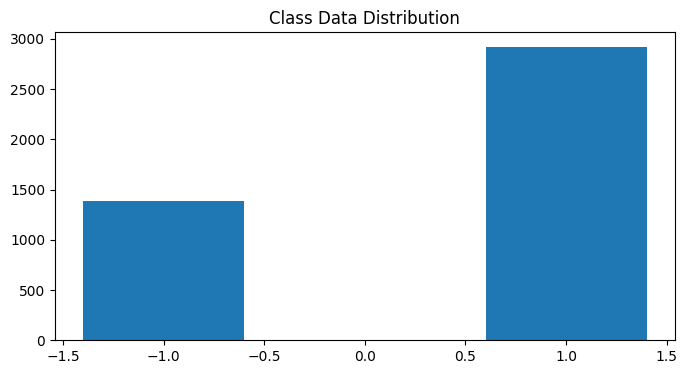

In [ ]:
val_count = df.Class.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Class Data Distribution")

In [ ]:
df.duplicated().sum()

50

In [ ]:
print("Before removing duplicates: ", df.shape)

# Remove duplicates
df = df.drop_duplicates()
df = df.dropna()

# Check the shape after removing duplicates
print("After removing duplicates: ", df.shape)

Before removing duplicates:  (4676, 2)
After removing duplicates:  (4252, 2)


In [ ]:
# Check if the text is in English
def is_english(text):
    if text and re.match('^[A-Za-z0-9 .,!?\-\'"]*$', text):
        return None  # Return None for English text
    return text  # Keep the original text for non-English

df['Tweet'] = df['Tweet'].apply(is_english)

In [ ]:
#remove English
english = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z",
          "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
for eng in english:
    df['Tweet'] = df['Tweet'].str.replace(eng, ' ')

df.head()

,Tweet,Class
0,وزير الخارجية اللبناني جبران باسيل قال في سلسل...,1.0
1,سورية بلد الحضارات تربطها بعلية او بحيوان,1.0
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,1.0
3,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكرة قلهم...,1.0
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,-1.0


In [ ]:
# Regular expression pattern for identifying most URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# Replace URLs with an empty string in the specific column
df['Tweet'] = df['Tweet'].str.replace(url_pattern, '', regex=True)
df.head()

,Tweet,Class
0,وزير الخارجية اللبناني جبران باسيل قال في سلسل...,1.0
1,سورية بلد الحضارات تربطها بعلية او بحيوان,1.0
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,1.0
3,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكرة قلهم...,1.0
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,-1.0


In [ ]:
# Check mentions and remove any mentions
mentions = []
for Tweet in df['Tweet']:
    if Tweet is not None:
        mentions.extend(re.findall(r'@\w+', Tweet))

# Remove all mentions from the dataset
df['Tweet'] = df['Tweet'].apply(lambda Tweet: re.sub(r'@\w+', '', Tweet) if Tweet is not None else Tweet)

df.head()

,Tweet,Class
0,وزير الخارجية اللبناني جبران باسيل قال في سلسل...,1.0
1,سورية بلد الحضارات تربطها بعلية او بحيوان,1.0
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,1.0
3,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكرة قلهم...,1.0
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,-1.0


In [ ]:
# Remove numbers from the 'Tweet' column
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
def normalize(sentence):

    sentence = re.sub("[إأآا]", "ا", sentence)
    sentence = re.sub("ى", "ي", sentence)
    sentence = re.sub("ؤ", "ء", sentence)
    sentence = re.sub("ئ", "ء", sentence)
    sentence = re.sub("ة", "ه", sentence)
    sentence = re.sub("گ", "ك", sentence)
    return sentence

def normalize_reviews(df, column_name):
    df[column_name ] = df[column_name].apply(lambda x: normalize(x) if isinstance(x, str) else x)
    return df


df = normalize_reviews(df, 'Tweet')
df.head()

,Tweet,Class
0,وزير الخارجيه اللبناني جبران باسيل قال في سلسل...,1.0
1,سوريه بلد الحضارات تربطها بعليه او بحيوان,1.0
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,1.0
3,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكره قلهم...,1.0
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,-1.0


In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "؟"]
for char in spec_chars:
    df['Tweet'] = df['Tweet'].str.replace(char, ' ')

df.head()

<ipython-input-47-16909e8e1ed7>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Tweet'] = df['Tweet'].str.replace(char, ' ')


,Tweet,Class
0,وزير الخارجيه اللبناني جبران باسيل قال في سلسل...,1.0
1,سوريه بلد الحضارات تربطها بعليه او بحيوان,1.0
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,1.0
3,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكره قلهم...,1.0
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,-1.0


In [ ]:
stop_words = stopwords.words('arabic')

In [ ]:
def removing_ar_stopwords(text):

    original_words = []
    # Tokenize the sentence to tokens
    words = word_tokenize(text)
    for word in words:
        if word not in stop_words:
            original_words.append(word)
    filtered_sentence = " ".join(original_words)
    return filtered_sentence

df.head()

,Tweet,Class
0,وزير الخارجيه اللبناني جبران باسيل قال في سلسل...,1.0
1,سوريه بلد الحضارات تربطها بعليه او بحيوان,1.0
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,1.0
3,ما فيك تعيش بلا ما تكب فتن ليل نهار وبكره قلهم...,1.0
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,-1.0


In [ ]:
def remove_duplicate_words(text):
    # Check for None values
    if text is None:
        return None

    # Split the text into words
    words = text.split()

    # Remove duplicates while preserving the order
    unique_words = []
    for word in words:
        if word not in unique_words:
            unique_words.append(word)

    # Reconstruct the sentence with unique words
    cleaned_text = ' '.join(unique_words)

    return cleaned_text

# Remove rows with 'None' values in the 'Comment' column
df = df[df['Tweet'].notna()]

# Apply the function to the 'Comment' column in your DataFrame
df['Tweet'] = df['Tweet'].apply(remove_duplicate_words)
df.head()

,Tweet,Class
0,وزير الخارجيه اللبناني جبران باسيل قال في سلسل...,1.0
1,سوريه بلد الحضارات تربطها بعليه او بحيوان,1.0
2,اخي الحاج اذا شعرت انك محرجا من الانتقادات لتص...,1.0
3,ما فيك تعيش بلا تكب فتن ليل نهار وبكره قلهم ال...,1.0
4,هذا البطل الذي قاتل وجاذف بحياته لتحيا انت يا ...,-1.0


In [ ]:
from imblearn.over_sampling import RandomOverSampler
X = df['Tweet']
y = df['Class']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply RandomOverSampler to balance the training set
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train.values.reshape(-1, 1), y_train)

In [ ]:
balanced_df = pd.DataFrame({'Tweet': X_resampled.flatten(), 'Class': y_resampled})
balanced_df

,Tweet,Class
0,عوي يا كلب السعوديه نحن دايسين ع راسك وراسك مع...,-1.0
1,الطاءفه الموحدين الدروز هناك شيخ عقل واحد وهو ...,1.0
2,فرق كتير كبير بين الرءيس ميشال عون وبين جبران ...,1.0
3,معناها المسيحيه ناجحين اكتر من الاسلام عالتعبير,1.0
4,قطر شنت الحرب علي اليمن اخرجت سوريا من الجامعه...,1.0
...,...,...
4591,الموت ل وفاء كيلاني طعمرك الهي خطافه الرجاله,-1.0
4592,دون شك انو مستاهل الحذاء لكن انغلترا بلد الحري...,-1.0
4593,احقر انسان,-1.0
4594,الله بلعن يلي ربط الحمار وفلتك شو انك فهيم,-1.0


In [ ]:
counts = balanced_df['Class'].value_counts()
counts

-1.0    2298
 1.0    2298
Name: Class, dtype: int64

In [ ]:
vectorizer1 = CountVectorizer()
train_vector = vectorizer1.fit_transform(X_train)
test_vector = vectorizer1.transform(X_test)

In [ ]:
LR = LogisticRegression()
LR.fit(train_vector,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(test_vector)

In [ ]:
LR.score(test_vector, y_test)
accuracy = accuracy_score(y_test, pred_lr)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 83.43%


In [ ]:
# Initialize the Random Forest model
rf_modelarab = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_modelarab.fit(train_vector, y_train)

# Make predictions on the test set
y_predarab = rf_modelarab.predict(test_vector)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_predarab)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 82.96%


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")  # Example using Arabic-BERT
model = TFAutoModelForSequenceClassification.from_pretrained("aubmindlab/bert-base-arabertv2")

NameError: ignored

#Applying Multilingual BERT Model

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader
from torch.nn.functional import softmax

# Load English data from CSV
english_data = data['text'].tolist()
# Assuming you have a 'label' column for English data
labels_english = data['sentiment'].tolist()

# Load Arabic data from CSV
arabic_data = df['Tweet'].tolist()
# Assuming you have a 'label' column for Arabic data
labels_arabic = df['Class'].tolist()

In [ ]:
model_name = 'bert-base-multilingual-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=max(len(set(labels_english)), len(set(labels_arabic))))

In [ ]:
# Tokenize and convert to tensors
def preprocess_data(texts):
    return tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

In [ ]:
#english_inputs = preprocess_data(english_data)
#arabic_inputs = preprocess_data(arabic_data)
english_inputs = [tokenizer.encode_plus(text, add_special_tokens=True, return_tensors='pt') for text in english_data]

In [ ]:
# Pad sequences to the same length
from torch.nn.utils.rnn import pad_sequence
input_ids = pad_sequence([x['input_ids'].squeeze(0) for x in english_inputs], batch_first=True)
attention_mask = pad_sequence([x['attention_mask'].squeeze(0) for x in english_inputs], batch_first=True)
token_type_ids = pad_sequence([x['token_type_ids'].squeeze(0) for x in english_inputs], batch_first=True)

In [ ]:
# Set model to evaluation mode
model.eval()

In [ ]:
def get_predictions(input_ids, attention_mask, token_type_ids):
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        probabilities = softmax(outputs.logits, dim=1)
    return probabilities.tolist()

In [ ]:
# Get predictions for English data
#english_predictions = get_predictions(input_ids, attention_mask, token_type_ids)
#print("English Predictions:", english_predictions)